In [5]:
from itertools import combinations

import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [8]:
COLORS = [
    '#00B0F0',
    '#FF0000'
]

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
# First, we'll build a structural causal model (SCM)
class GPSMemorySCM:
    
    def __init__(self, random_seed=None):
        self.random_seed = random_seed
        self.u_x = stats.truncnorm(0, np.infty, scale=5)
        self.u_y = stats.norm(scale=2)
        self.u_z = stats.norm(scale=2)
        self.u = stats.truncnorm(0, np.infty, scale=4)
        
    def sample(self, sample_size=100, treatment_value=None):
        """Samples from the SCM"""
        if self.random_seed:
            np.random.seed(self.random_seed)
        
        u_x = self.u_x.rvs(sample_size)
        u_y = self.u_y.rvs(sample_size)
        u_z = self.u_z.rvs(sample_size)
        u = self.u.rvs(sample_size)
        
        if treatment_value:
            gps = np.array([treatment_value]*sample_size)
        else:
            gps = u_x + 0.7*u
            
        hippocampus = -0.6*gps + 0.25*u_z
        memory = 0.7*hippocampus + 0.25*u
        
        return gps, hippocampus, memory
    
    def intervene(self, treatment_value, sample_size=100):
        """Intervenes on the SCM"""
        return self.sample(treatment_value=treatment_value, sample_size=sample_size)

In [6]:
# Instantiate the SCM
scm = GPSMemorySCM()

# Generate observational data
gps_obs, hippocampus_obs, memory_obs = scm.sample(600)

# Run an experiment
treatments = []
experiment_results = []

# Sample over various treatments
for treatment in np.arange(1, 21):
    gps_hours, hippocampus, memory = scm.intervene(treatment_value=treatment, sample_size=30)
    experiment_results.append(memory)
    treatments.append(gps_hours)

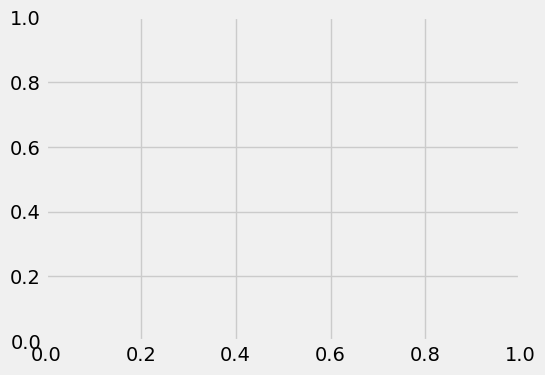

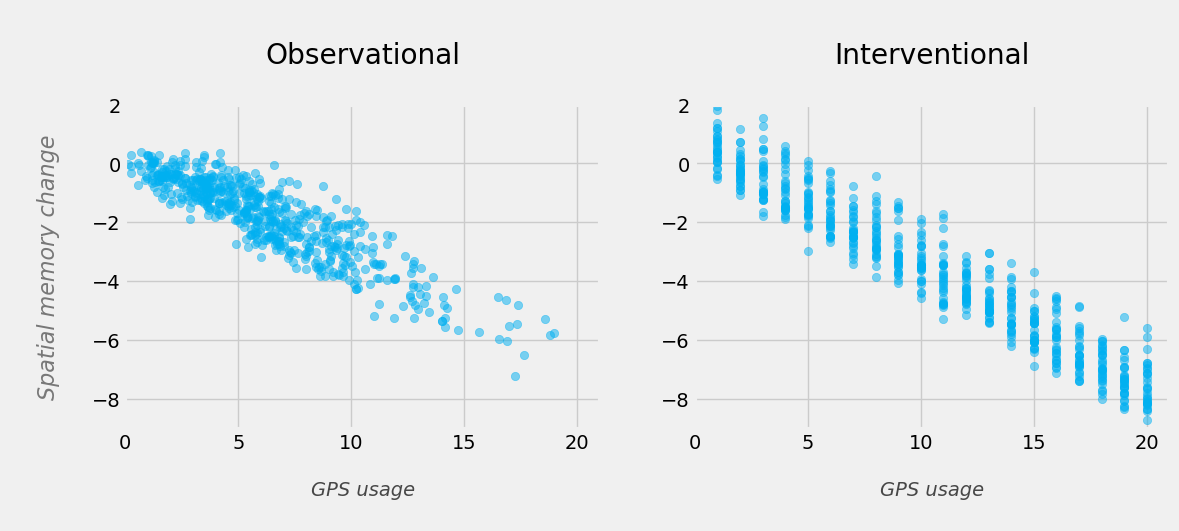

In [9]:
# Plot observational data
plt.figure(figsize=(12, 4))

# Observational
plt.subplot(121)
plt.scatter(gps_obs, memory_obs, alpha=.5, color=COLORS[0])
plt.xlim(0, 21)
plt.ylim(-9, 2)

plt.title('\nObservational\n')
plt.xlabel('\nGPS usage', alpha=.7, fontsize=14, style='italic')
plt.ylabel('\nSpatial memory change\n', alpha=.5, fontsize=16, style='italic')


# Interventional
plt.subplot(122)

plt.scatter(treatments, experiment_results, alpha=.5, color=COLORS[0])
plt.xlim(0, 21)
plt.ylim(-9, 2)

plt.title('\nInterventional\n')
plt.xlabel('\nGPS usage\n', alpha=.7, fontsize=14, style='italic')

plt.show()

In [10]:
lr_naive = LinearRegression()
lr_naive.fit(
    X=gps_obs.reshape(-1, 1), 
    y=memory_obs
)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
treatments_unpack = np.array(treatments).flatten()
results_unpack = np.array(experiment_results).flatten()

lr_experiment = LinearRegression()
lr_experiment.fit(
    X=treatments_unpack.reshape(-1, 1), 
    y=results_unpack
)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
X_test = np.arange(1, 21).reshape(-1, 1)

preds_naive = lr_naive.predict(X_test) 
preds_experiment = lr_experiment.predict(X_test)

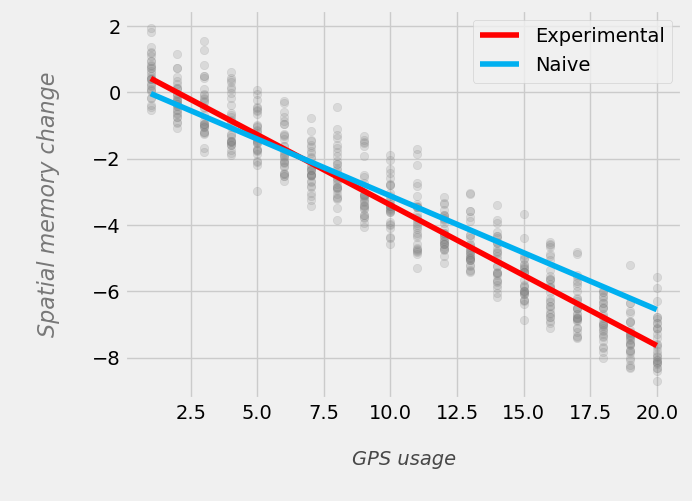

In [13]:
plt.scatter(treatments, experiment_results, alpha=.2, color='gray')
plt.plot(X_test, preds_experiment, label='Experimental', color=COLORS[1])
plt.plot(X_test, preds_naive, label='Naive', color=COLORS[0])

plt.xlabel('\nGPS usage\n', alpha=.7, fontsize=14, style='italic')
plt.ylabel('\nSpatial memory change\n', alpha=.5, fontsize=16, style='italic')

plt.legend()
plt.show()

In [14]:
from dowhy.causal_model import CausalModel
from sklearn.linear_model import LinearRegression


ModuleNotFoundError: No module named 'dowhy'